In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

Loading in each of the three datasets.

In [ ]:
degree_original = pd.read_csv("degrees-that-pay-back.csv")
degree_original.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [ ]:
college_original = pd.read_csv('salaries-by-college-type.csv')
college_original.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [ ]:
region_original = pd.read_csv("salaries-by-region.csv")
region_original.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [ ]:
#Take only the relevant columns of each dataset 
degree = degree_original[["Undergraduate Major", "Starting Median Salary"]]
college = college_original[["School Name" , "School Type", "Starting Median Salary"]]
region = region_original[["School Name", "Region", "Starting Median Salary"]]

In [ ]:
#Merge college and region data based on school name
#Used inner so only captures overlapping school names 
merge = pd.merge(college, region, how='inner')
merge = merge[["School Name", "Region", "School Type", "Starting Median Salary"]]
merge

,School Name,Region,School Type,Starting Median Salary
0,Massachusetts Institute of Technology (MIT),Northeastern,Engineering,"$72,200.00"
1,California Institute of Technology (CIT),California,Engineering,"$75,500.00"
2,Harvey Mudd College,California,Engineering,"$71,800.00"
3,"Polytechnic University of New York, Brooklyn",Northeastern,Engineering,"$62,400.00"
4,Cooper Union,Northeastern,Engineering,"$62,200.00"
...,...,...,...,...
263,Austin Peay State University,Southern,State,"$37,700.00"
264,Pittsburg State University,Midwestern,State,"$40,400.00"
265,Southern Utah University,Western,State,"$41,900.00"
266,Montana State University - Billings,Western,State,"$37,900.00"


In [ ]:
#Cast incomes as integers

merge["Starting Median Salary"] = merge["Starting Median Salary"].str.replace("$", "").str.replace(",","").str.strip("0").str.replace(".","").astype('int64')

Data should be clean now. Time to start the ML portion.

In [ ]:
#Split into training and test set. 
X = merge[["School Name", "Region", "School Type"]]
y = merge[["Starting Median Salary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [ ]:
#One Hot Encode Categorical Variables 
enc = OneHotEncoder()
enc.fit(X)

enc_train = enc.transform(X_train).toarray()
enc_test = enc.transform(X_test).toarray()

In [ ]:
#Linear Regression Model
reg = LinearRegression().fit(enc_train, y_train)
reg.score(enc_train, y_train)

y_pred = reg.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

MAE: 3219.963988414173
MSE: 22717343.626066785
R2 Score: 0.3396827366915549


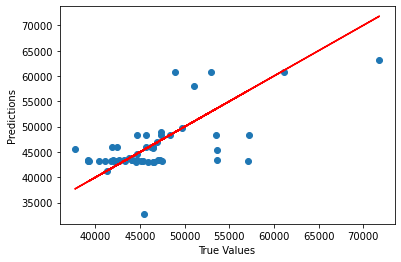

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r')

In [ ]:
#Testing a Ridge Regression model with Cross Validation built in 
clf = RidgeCV()
clf.fit(enc_train, y_train)
print(clf.score(enc_train, y_train))

y_pred = clf.predict(enc_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

0.9969329808642585
MAE: 2971.6100724627486
MSE: 19124983.66405381
R2 Score: 0.44410063598385596


In [ ]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(enc_train, y_train)

y_pred = regressor.predict(enc_test)

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3833.3333333333335
Mean Squared Error: 26182222.222222224
Root Mean Squared Error: 5116.856673996471


In [ ]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_253 <= 0.50
|   |--- feature_254 <= 0.50
|   |   |--- feature_248 <= 0.50
|   |   |   |--- feature_257 <= 0.50
|   |   |   |   |--- feature_250 <= 0.50
|   |   |   |   |   |--- feature_166 <= 0.50
|   |   |   |   |   |   |--- feature_172 <= 0.50
|   |   |   |   |   |   |   |--- feature_201 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_256 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_252 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_39 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_39 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [46100.00]
|   |   |   |   |   |   |   |   |   |--- feature_252 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_243 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_243 >  0.50
|   |   |   |   |   |   |   | 

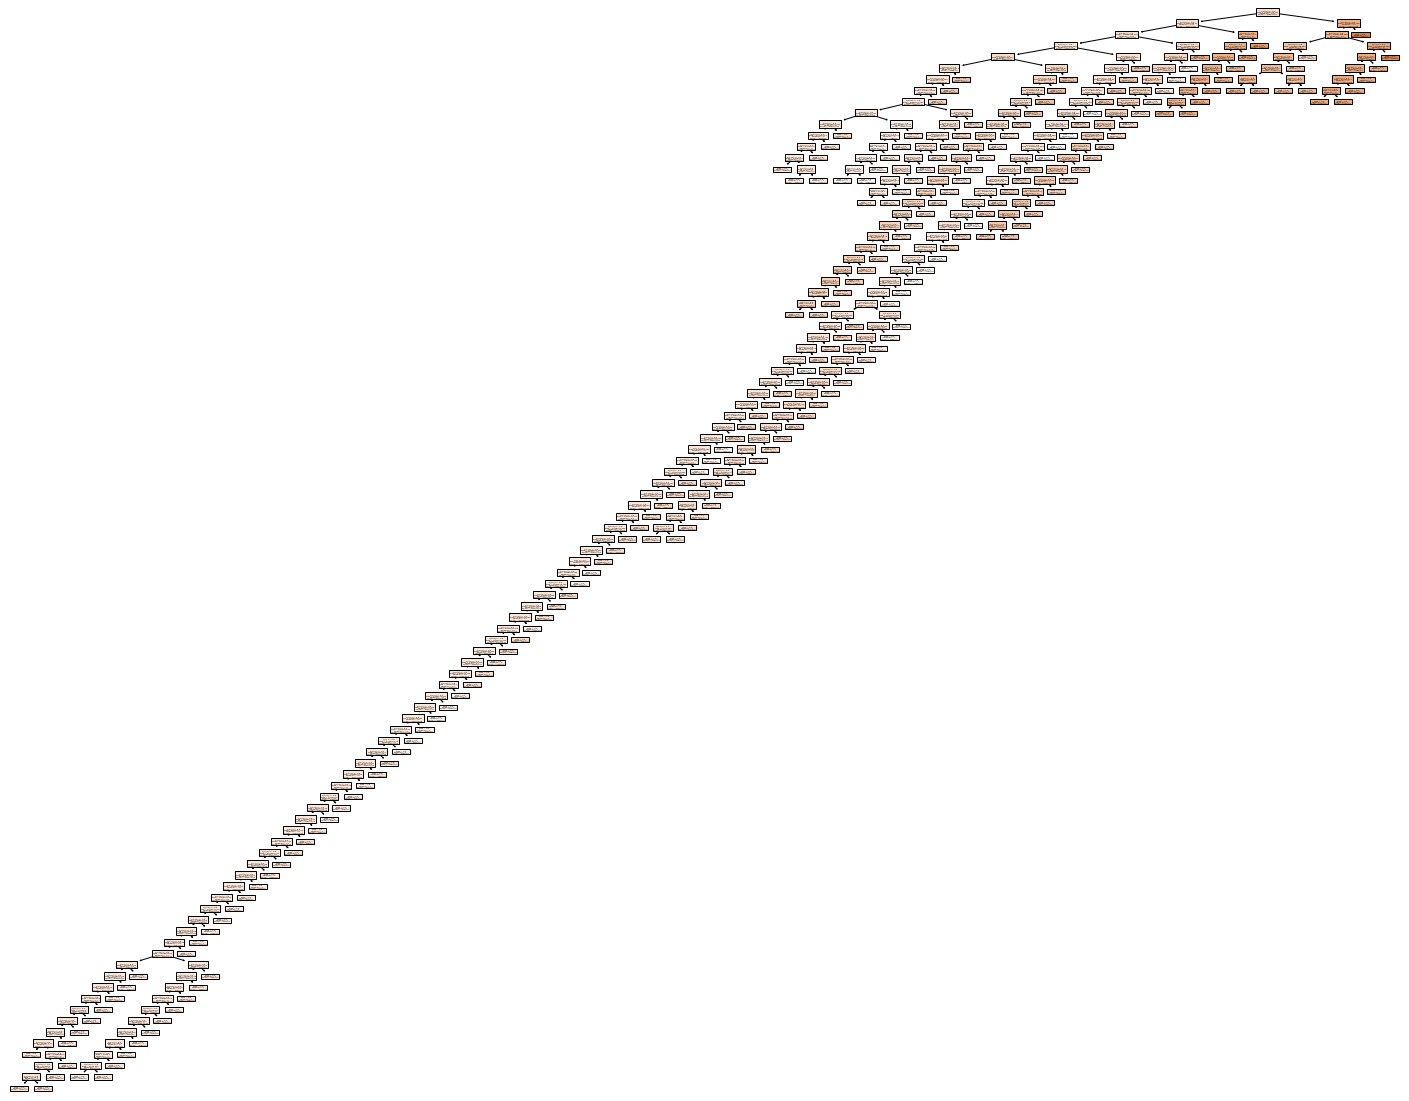

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, filled=True)
fig.savefig("decistion_tree.svg")

In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

regressor2 = RandomForestRegressor(n_estimators = 200, random_state = 0, max_depth = 300)
regressor2.fit(enc_train, y_train.values.ravel())

y_pred = regressor2.predict(enc_test)

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3335.564814814815
Mean Squared Error: 22214433.291666668
Root Mean Squared Error: 4713.218994664546


In [ ]:
#SVM Model
from sklearn.svm import SVR

regressor3 = SVR()
regressor3.fit(enc_train, y_train.values.ravel())

y_pred = regressor3.predict(enc_test)

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3951.715804843569
Mean Squared Error: 37895248.12096645
Root Mean Squared Error: 6155.911640120125
